In [1]:
#Importing the data and the relevant libraries
import pandas as pd
import numpy as np

df = pd.read_csv("listings_detailed.csv", encoding='latin-1')
df = df.dropna()

In [2]:
display(df)

,price,neighbourhood_cleansed,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,short_stay
0,853,Norrmalms,11347,59.34342,18.05298,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Internet,Wifi,""Wheelchair accessible"",""Paid p...",1
1,1079,Skarpnäcks,12838,59.27054,18.11231,t,Bed and breakfast,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,""Free parking on premises"",""Family/kid f...",1
2,1285,Södermalms,118 53,59.31364,18.05256,f,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Paid parking off ...",1
4,3247,Södermalms,11739,59.31535,18.03277,t,Apartment,Entire home/apt,2,1.0,2.0,2.0,Real Bed,"{TV,Wifi,Kitchen,Elevator}",1
5,598,Södermalms,11864,59.31268,18.06258,t,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,"{TV,Internet,Wifi,Elevator,""Buzzer/wireless in...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7849,196,Rinkeby-Tensta,163 74,59.38766,17.93615,t,Apartment,Private room,2,1.5,1.0,1.0,Real Bed,"{Wifi,Kitchen,""Pets allowed"",Elevator,Heating,...",1
7850,549,Hässelby-Vällingby,165 66,59.36233,17.83382,t,Serviced apartment,Entire home/apt,1,1.0,0.0,1.0,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",""P...",1
7851,1001,Hägersten-Liljeholmens,117 68,59.31533,17.99404,t,Apartment,Entire home/apt,5,1.0,1.0,3.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""Paid parking off pr...",1
7852,2295,Östermalms,115 47,59.35901,18.09062,f,Apartment,Entire home/apt,5,2.0,3.0,0.0,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",El...",1


In [3]:
#The amenities that a listing offered are prsent in a single column in a set. We need to turn that set into columns whose values are 0 or 1 if the amenity is in the set.
import re
def split_and_clean_amenities(amenities_str):
    amenities = amenities_str.strip('{}').split(',')
    cleaned_amenities = [amenity.strip() for amenity in amenities]
    return set(cleaned_amenities)

df['amenities'] = df['amenities'].apply(split_and_clean_amenities)


unique_amenities = set([amenity for amenities in df['amenities'] for amenity in amenities])


for amenity in unique_amenities:
    df[amenity] = df['amenities'].apply(lambda x: 1 if amenity in x else 0)


df.drop('amenities', axis=1, inplace=True)

print(df)

      price  neighbourhood_cleansed zipcode  latitude  longitude  \
0       853               Norrmalms   11347  59.34342   18.05298   
1      1079              Skarpnäcks   12838  59.27054   18.11231   
2      1285              Södermalms  118 53  59.31364   18.05256   
4      3247              Södermalms   11739  59.31535   18.03277   
5       598              Södermalms   11864  59.31268   18.06258   
...     ...                     ...     ...       ...        ...   
7849    196          Rinkeby-Tensta  163 74  59.38766   17.93615   
7850    549      Hässelby-Vällingby  165 66  59.36233   17.83382   
7851   1001  Hägersten-Liljeholmens  117 68  59.31533   17.99404   
7852   2295              Östermalms  115 47  59.35901   18.09062   
7853    353          Rinkeby-Tensta  164 53  59.40433   17.94475   

     is_location_exact       property_type        room_type  accommodates  \
0                    t           Apartment     Private room             2   
1                    t   Bed 

<ipython-input-3-9b41e37c8750>:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[amenity] = df['amenities'].apply(lambda x: 1 if amenity in x else 0)
<ipython-input-3-9b41e37c8750>:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[amenity] = df['amenities'].apply(lambda x: 1 if amenity in x else 0)
<ipython-input-3-9b41e37c8750>:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.

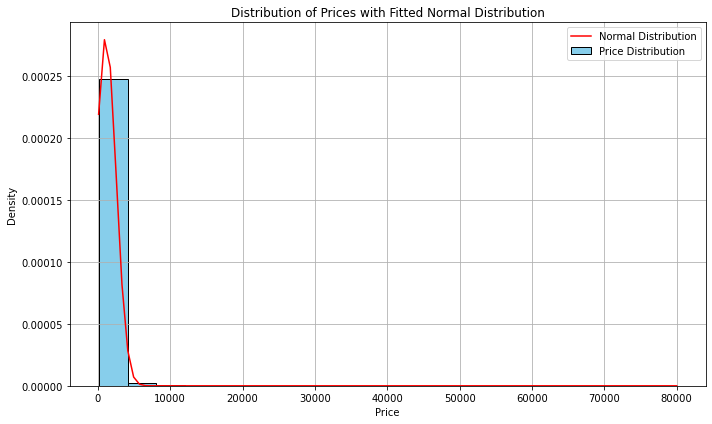

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df["price"], bins=20, color='skyblue', edgecolor='black', density=True)


mu, sigma = np.mean(df["price"]), np.std(df["price"])
x = np.linspace(min(df["price"]), max(df["price"]), 100)
y = (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(-(x - mu)**2 / (2 * sigma**2))
plt.plot(x, y, color='red')

plt.xlabel("Price")
plt.ylabel("Density")
plt.title("Distribution of Prices with Fitted Normal Distribution")
plt.legend(["Normal Distribution", "Price Distribution"])
plt.grid(True)
plt.tight_layout()


plt.show()

In [5]:
#The chart above shows outliers/dataerrors as some listings are exorbitantly expenssive. We should impose a price limit

In [6]:
#We drop every listing above the 95% percentile (2452)
percentile_95 = df["price"].quantile(0.95)
df = df[df["price"] < percentile_95]

print(percentile_95)

2452.0


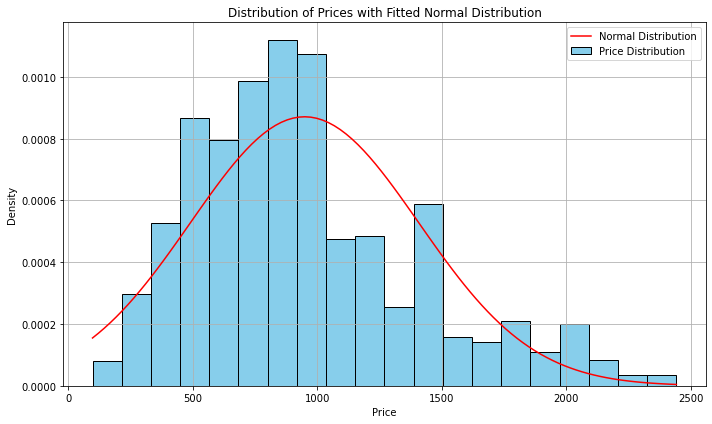

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(df["price"], bins=20, color='skyblue', edgecolor='black', density=True)


mu, sigma = np.mean(df["price"]), np.std(df["price"])
x = np.linspace(min(df["price"]), max(df["price"]), 100)
y = (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(-(x - mu)**2 / (2 * sigma**2))
plt.plot(x, y, color='red')

plt.xlabel("Price")
plt.ylabel("Density")
plt.title("Distribution of Prices with Fitted Normal Distribution")
plt.legend(["Normal Distribution", "Price Distribution"])
plt.grid(True)
plt.tight_layout()


plt.show()

In [8]:
#Looks better

In [9]:
#There's three categorical variables that we want to turn into dummies
dummy_df = pd.get_dummies(df['neighbourhood_cleansed'].str.split(', ').explode())
df = pd.concat([df, dummy_df], axis=1)


In [10]:
dummy_df = pd.get_dummies(df['property_type'].str.split(', ').explode())
df = pd.concat([df, dummy_df], axis=1)

In [11]:
dummy_df = pd.get_dummies(df['room_type'].str.split(', ').explode())
df = pd.concat([df, dummy_df], axis=1)

In [12]:
with pd.option_context('display.max_columns', None):  # more options can be specified also
    print(df)

      price  neighbourhood_cleansed zipcode  latitude  longitude  \
0       853               Norrmalms   11347  59.34342   18.05298   
1      1079              Skarpnäcks   12838  59.27054   18.11231   
2      1285              Södermalms  118 53  59.31364   18.05256   
5       598              Södermalms   11864  59.31268   18.06258   
6       745              Södermalms   11737  59.31568   18.03138   
...     ...                     ...     ...       ...        ...   
7849    196          Rinkeby-Tensta  163 74  59.38766   17.93615   
7850    549      Hässelby-Vällingby  165 66  59.36233   17.83382   
7851   1001  Hägersten-Liljeholmens  117 68  59.31533   17.99404   
7852   2295              Östermalms  115 47  59.35901   18.09062   
7853    353          Rinkeby-Tensta  164 53  59.40433   17.94475   

     is_location_exact       property_type        room_type  accommodates  \
0                    t           Apartment     Private room             2   
1                    t   Bed 

In [13]:
#Our first model includes how many tenants the listing accommodates, where it is located, all the amenities and the accommodation type.
#It does not include an intercept as we did not exclude a column for each categorical variable
import statsmodels.api as sm

Y = df.iloc[:,0]
X = pd.concat([df.iloc[:,8], df.iloc[:,13:15], df.iloc[:,16:]], axis=1)

model = sm.OLS(Y, X).fit()

coefficients = model.params
summary = model.summary()

print("Coefficients:", coefficients)
print(summary)

C:\Users\claud\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "
C:\Users\claud\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\claud\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


Coefficients: accommodates                                    109.002523
short_stay                                       91.663201
                                                132.278600
"translation missing: en.hosting_amenity_50"    -36.808349
"Roll-in shower"                                  0.978318
                                                   ...    
Villa                                            46.257953
Entire home/apt                                 313.032082
Hotel room                                      276.384554
Private room                                     87.673709
Shared room                                      51.014914
Length: 202, dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                    

In [14]:
#The second model uses the number of bedrooms and bathrooms instead of how many people the listing accommodates
Y = df.iloc[:,0]
X = pd.concat([df.iloc[:,9:11], df.iloc[:,13:15], df.iloc[:,16:]], axis=1)


model = sm.OLS(Y, X).fit()

coefficients = model.params
summary = model.summary()

print("Coefficients:", coefficients)
print(summary)

Coefficients: bathrooms                                       104.067665
bedrooms                                        172.024555
short_stay                                      118.844875
                                                122.344719
"translation missing: en.hosting_amenity_50"    -28.314198
                                                   ...    
Villa                                           -94.275016
Entire home/apt                                 345.870780
Hotel room                                      153.647124
Private room                                     29.766029
Shared room                                      22.422743
Length: 203, dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                    

In [15]:
#We can see that the model is better at predicting prices, if the number of rooms is used rather than how many people the listing accommodates.
#We see that from the R2 and R2 adjusted being higher, but also from the Log-likelihood which is higher in the second model. Another parameter that points at that is the Akaike Information Criterion which is (marginally) lower in the second model.

In [16]:
#Removing the " from the columns names
df.columns = df.columns.str.replace('"','')

In [17]:
#We can try to improve the model by avoiding to overfit it.As such, we select only a few amenities
rooms_and_amenities = ["bedrooms", "bathrooms", "Long term stays allowed", "Kitchen", "Indoor fireplace", "TV", "Carbon monoxide detector",
                    "Free street parking", "Fire extinguisher", "Wifi", "Pets allowed", "Pool",
                    "Heating", "Air conditioning", "Garden or backyard"]
neighbourhoods = df.neighbourhood_cleansed.unique()
room_type = df.room_type.unique()
X = pd.concat([df[rooms_and_amenities], df[neighbourhoods], df[room_type]], axis=1)

In [18]:
model = sm.OLS(Y, X).fit()

coefficients = model.params
summary = model.summary()

print("Coefficients:", coefficients)
display(summary)

Coefficients: bedrooms                    186.433289
bathrooms                    96.168852
Long term stays allowed      41.312909
Kitchen                     -12.745383
Indoor fireplace            137.998195
TV                           77.264627
Carbon monoxide detector     39.513233
Free street parking         -43.185285
Fire extinguisher            47.910063
Wifi                         38.620986
Pets allowed                -50.411508
Pool                        -43.220521
Heating                     -17.324956
Air conditioning             16.818294
Garden or backyard           -7.965017
Norrmalms                   282.541781
Skarpnäcks                  -16.747359
Södermalms                  293.656179
Kungsholmens                190.151895
Rinkeby-Tensta                6.323959
Farsta                      -90.648047
Älvsjö                       -6.001714
Östermalms                  256.784985
Enskede-Årsta-Vantörs        -8.910721
Hägersten-Liljeholmens       -7.873501
Bromma     

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     191.2
Date:                Sun, 17 Sep 2023   Prob (F-statistic):               0.00
Time:                        10:36:00   Log-Likelihood:                -50652.
No. Observations:                6998   AIC:                         1.014e+05
Df Residuals:                    6966   BIC:                         1.016e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
bedrooms                   186.4333      5.533     33.696      0.000     175.587     197.279
bathrooms                   96.1689     13.338      7.210      0.000      70.022     122.316
Long term stays allowed     41.3129     13.055      3.164      0.002      15.721      66.905
Kitchen                    -12.7454     20.396     -0.625      0.532     -52.727      27.237
Indoor fireplace           137.9982     13.671     10.094      0.000     111.199     164.797
TV                          77.2646      9.969      7.750      0.000      57.722      96.807
Carbon monoxide detector    39.5132     13.256      2.981      0.003      13.528      65.499
Free street parking        -43.1853     18.501     -2.334      0.020     -79.453      -6.918
Fire extinguisher           47.9101      8.974      5.339      0.000      30.319      65.501
Wifi                        38.6210     21.029      1.837      0.066      -2.602      79.844
Pets allowed               -50.4115     11.617     -4.339      0.000     -73.184     -27.639
Pool                       -43.2205     40.725     -1.061      0.289    -123.054      36.613
Heating                    -17.3250     15.823     -1.095      0.274     -48.344      13.694
Air conditioning            16.8183     15.322      1.098      0.272     -13.218      46.855
Garden or backyard          -7.9650     14.352     -0.555      0.579     -36.098      20.168
Norrmalms                  282.5418     19.254     14.674      0.000     244.798     320.286
Skarpnäcks                 -16.7474     23.454     -0.714      0.475     -62.725      29.230
Södermalms                 293.6562     17.449     16.830      0.000     259.452     327.861
Kungsholmens               190.1519     19.498      9.752      0.000     151.929     228.375
Rinkeby-Tensta               6.3240     26.720      0.237      0.813     -46.055      58.703
Farsta                     -90.6480     28.312     -3.202      0.001    -146.148     -35.148
Älvsjö                      -6.0017     32.126     -0.187      0.852     -68.978      56.974
Östermalms                 256.7850     20.127     12.758      0.000     217.330     296.239
Enskede-Årsta-Vantörs       -8.9107     20.858     -0.427      0.669     -49.799      31.978
Hägersten-Liljeholmens      -7.8735     20.012     -0.393      0.694     -47.103      31.356
Bromma                     -39.5216     23.234     -1.701      0.089     -85.067       6.024
Skärholmens               -105.2664     42.021     -2.505      0.012    -187.639     -22.893
Hässelby-Vällingby        -171.5544     31.185     -5.501      0.000    -232.687    -110.422
Spånga-Tensta              -98.0866     38.979     -2.516      0.012    -174.497     -21.676
Private room                57.2248     28.280      2.024      0.043       1.787     112.662
Entire home/ap

In [19]:
#We can further improve it by taking the log of price and use that as our Y variable. Since we are trying to estimate a big number (one with 4 digits) with small numbers which never take more than one digit

In [20]:
import math

df["log_price"] = df["price"].apply(math.log)

In [21]:
#Running the new regression
Y = df.iloc[:, -1]

model = sm.OLS(Y, X).fit()
coefficients = model.params
summary = model.summary()

print("Coefficients:", coefficients)
display(summary)

Coefficients: bedrooms                    0.182479
bathrooms                   0.080619
Long term stays allowed     0.035347
Kitchen                    -0.051166
Indoor fireplace            0.128885
TV                          0.110059
Carbon monoxide detector    0.033863
Free street parking        -0.057117
Fire extinguisher           0.038974
Wifi                        0.038062
Pets allowed               -0.048981
Pool                       -0.027333
Heating                    -0.031660
Air conditioning            0.019114
Garden or backyard          0.002625
Norrmalms                   1.598842
Skarpnäcks                  1.262692
Södermalms                  1.616360
Kungsholmens                1.505724
Rinkeby-Tensta              1.269388
Farsta                      1.165439
Älvsjö                      1.275744
Östermalms                  1.562977
Enskede-Årsta-Vantörs       1.247842
Hägersten-Liljeholmens      1.268391
Bromma                      1.238633
Skärholmens             

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     242.7
Date:                Sun, 17 Sep 2023   Prob (F-statistic):               0.00
Time:                        10:36:00   Log-Likelihood:                -2646.9
No. Observations:                6998   AIC:                             5358.
Df Residuals:                    6966   BIC:                             5577.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
bedrooms                     0.1825      0.006     31.436      0.000       0.171       0.194
bathrooms                    0.0806      0.014      5.761      0.000       0.053       0.108
Long term stays allowed      0.0353      0.014      2.581      0.010       0.008       0.062
Kitchen                     -0.0512      0.021     -2.391      0.017      -0.093      -0.009
Indoor fireplace             0.1289      0.014      8.986      0.000       0.101       0.157
TV                           0.1101      0.010     10.523      0.000       0.090       0.131
Carbon monoxide detector     0.0339      0.014      2.435      0.015       0.007       0.061
Free street parking         -0.0571      0.019     -2.943      0.003      -0.095      -0.019
Fire extinguisher            0.0390      0.009      4.140      0.000       0.021       0.057
Wifi                         0.0381      0.022      1.725      0.085      -0.005       0.081
Pets allowed                -0.0490      0.012     -4.019      0.000      -0.073      -0.025
Pool                        -0.0273      0.043     -0.640      0.522      -0.111       0.056
Heating                     -0.0317      0.017     -1.907      0.057      -0.064       0.001
Air conditioning             0.0191      0.016      1.189      0.234      -0.012       0.051
Garden or backyard           0.0026      0.015      0.174      0.862      -0.027       0.032
Norrmalms                    1.5988      0.020     79.148      0.000       1.559       1.638
Skarpnäcks                   1.2627      0.025     51.314      0.000       1.214       1.311
Södermalms                   1.6164      0.018     88.295      0.000       1.580       1.652
Kungsholmens                 1.5057      0.020     73.604      0.000       1.466       1.546
Rinkeby-Tensta               1.2694      0.028     45.281      0.000       1.214       1.324
Farsta                       1.1654      0.030     39.236      0.000       1.107       1.224
Älvsjö                       1.2757      0.034     37.850      0.000       1.210       1.342
Östermalms                   1.5630      0.021     74.018      0.000       1.522       1.604
Enskede-Årsta-Vantörs        1.2478      0.022     57.022      0.000       1.205       1.291
Hägersten-Liljeholmens       1.2684      0.021     60.412      0.000       1.227       1.310
Bromma                       1.2386      0.024     50.813      0.000       1.191       1.286
Skärholmens                  1.1036      0.044     25.034      0.000       1.017       1.190
Hässelby-Vällingby           0.9971      0.033     30.475      0.000       0.933       1.061
Spånga-Tensta                1.0453      0.041     25.560      0.000       0.965       1.125
Private room                 4.4768      0.030    150.884      0.000       4.419       4.535
Entire home/ap

In [22]:
#Whilst this model is much better, we should try to include a constant.

In [23]:
#If we include a constant we need to drop one column per categorical variable
X = X.drop('Hässelby-Vällingby', axis=1)
X = X.drop('Hotel room', axis=1)
print(X)

      bedrooms  bathrooms  Long term stays allowed  Kitchen  Indoor fireplace  \
0          1.0        1.0                        0        0                 0   
1          1.0        1.0                        0        0                 0   
2          1.0        1.0                        1        1                 0   
5          1.0        1.0                        1        0                 0   
6          1.0        1.0                        0        1                 0   
...        ...        ...                      ...      ...               ...   
7849       1.0        1.5                        0        1                 0   
7850       0.0        1.0                        0        1                 0   
7851       1.0        1.0                        0        1                 0   
7852       3.0        2.0                        0        1                 0   
7853       1.0        1.0                        0        1                 0   

      TV  Carbon monoxide d

In [24]:
 X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
coefficients = model.params
summary = model.summary()

print("Coefficients:", coefficients)
print(summary)

Coefficients: const                       5.600700
bedrooms                    0.182479
bathrooms                   0.080619
Long term stays allowed     0.035347
Kitchen                    -0.051166
Indoor fireplace            0.128885
TV                          0.110059
Carbon monoxide detector    0.033863
Free street parking        -0.057117
Fire extinguisher           0.038974
Wifi                        0.038062
Pets allowed               -0.048981
Pool                       -0.027333
Heating                    -0.031660
Air conditioning            0.019114
Garden or backyard          0.002625
Norrmalms                   0.601763
Skarpnäcks                  0.265613
Södermalms                  0.619281
Kungsholmens                0.508645
Rinkeby-Tensta              0.272309
Farsta                      0.168360
Älvsjö                      0.278665
Östermalms                  0.565898
Enskede-Årsta-Vantörs       0.250763
Hägersten-Liljeholmens      0.271311
Bromma                  

C:\Users\claud\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [25]:
#Of all the models the best one at estimating prices is the log-lin model, with intercept, with selected amenities

In [26]:
print(np.mean(df.price))

949.3169476993427
